In [1]:
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from time import perf_counter
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import warnings

%matplotlib inline

In [2]:
DATA_PATH = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/weekly_smoothed_agg.csv'
df = pd.read_csv(DATA_PATH)
df = df.drop(['Unnamed: 0', 'loc_id'], axis=1)

df = df.round(5) 
df

,latitude,longitude,0,1,2,3,4,5,6,7,...,43,44,45,46,47,48,49,50,51,52
0,3.0,33.0,6.49627,5.38635,4.49128,4.19533,4.31119,4.39201,4.54070,5.83596,...,26.77083,25.65520,24.28021,21.86168,18.15368,15.08472,12.70791,9.91375,8.08213,8.75719
1,3.0,33.5,5.93635,5.00142,4.35111,4.12670,4.35792,4.34729,4.49210,5.64719,...,21.44246,20.62315,19.36737,17.50219,14.72997,12.44871,10.85762,8.56579,7.30954,7.77616
2,3.0,34.0,5.70514,4.82565,4.36924,4.15622,4.40665,4.37797,4.47595,5.37997,...,17.20554,16.91743,16.13393,14.85094,12.76980,11.01659,10.00988,7.93365,6.95294,7.06680
3,3.0,34.5,5.55232,4.65156,4.33723,4.04889,4.22062,4.24933,4.17075,4.78169,...,14.68533,15.05462,14.82676,13.97961,12.25254,10.67962,9.91097,7.83512,6.74176,6.74819
4,3.0,35.0,4.78572,4.02284,3.85838,3.52846,3.65751,3.68210,3.43761,3.89393,...,10.36384,11.22362,11.41076,11.18859,10.08972,8.87939,8.38078,6.66211,5.76362,5.80713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,15.0,46.0,0.14146,0.16554,0.26512,0.42503,0.97214,1.23902,1.11140,1.20073,...,0.38117,0.37964,0.32752,0.27745,0.22043,0.17633,0.14269,0.14516,0.13288,0.44676
771,15.0,46.5,0.10477,0.11864,0.22369,0.31521,0.82931,0.93590,0.78097,0.82533,...,0.40238,0.43553,0.35971,0.28107,0.21757,0.17109,0.13056,0.12462,0.10868,0.30776
772,15.0,47.0,0.20786,0.22615,0.32826,0.45821,1.04208,1.08210,0.91756,0.95481,...,0.92727,0.98564,0.82885,0.63041,0.49861,0.40291,0.30461,0.29105,0.25283,0.42267
773,15.0,47.5,0.35756,0.39726,0.52315,0.69260,1.43612,1.47636,1.31012,1.33684,...,1.20044,1.33298,1.13311,0.86721,0.69976,0.59458,0.46776,0.44926,0.41536,0.65943


In [3]:
data = df.iloc[:,2:].values
data = data - np.mean(data,axis=0) 
data.shape

(775, 53)

In [4]:
data.shape[0]

775

In [5]:
kernel_emb = np.empty((5, data.shape[0], 3))

In [6]:
kernel_emb[0] = KernelPCA(n_components=3, kernel='linear').fit_transform(data)
kernel_emb[1] = KernelPCA(n_components=3, kernel='poly').fit_transform(data)
kernel_emb[2] = KernelPCA(n_components=3, kernel='rbf').fit_transform(data)
kernel_emb[3] = KernelPCA(n_components=3, kernel='sigmoid').fit_transform(data)
kernel_emb[4] = KernelPCA(n_components=3, kernel='cosine').fit_transform(data)

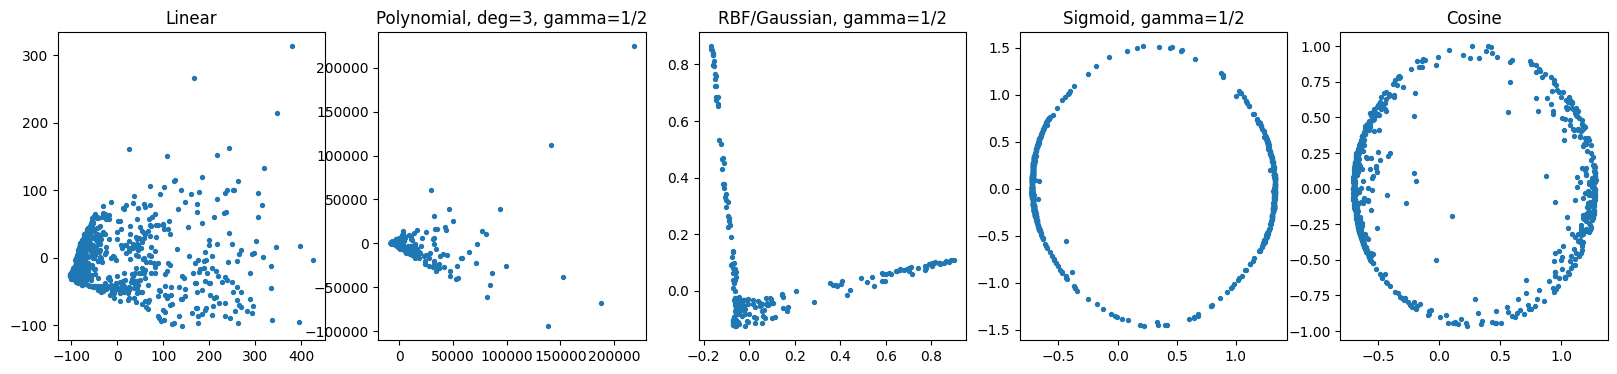

In [7]:
desc = ['Linear','Polynomial, deg=3, gamma=1/2', 'RBF/Gaussian, gamma=1/2', 'Sigmoid, gamma=1/2', 'Cosine']

fig,axes = plt.subplots(1,5, figsize=(20,4))
for i,ax in enumerate(axes.flat):
    ax.scatter(kernel_emb[i,:,0], kernel_emb[i,:,1], s=8)
    ax.set_title(desc[i])

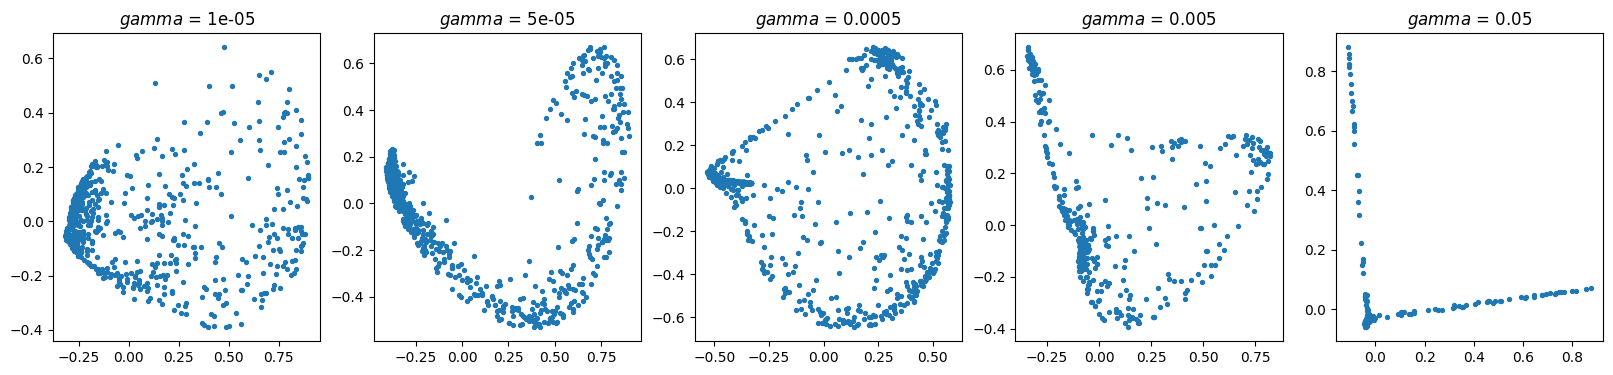

In [9]:
gamma_vals = np.asarray([0.00001, 0.00005, 0.0005, 0.005, 0.05])

kernel_emb = np.empty((gamma_vals.shape[0], data.shape[0], 2))

for i in range(gamma_vals.shape[0]):
    kernel_emb[i] = KernelPCA(n_components=2, kernel='rbf', gamma=gamma_vals[i]).fit_transform(data)

fig,axes = plt.subplots(1,gamma_vals.shape[0], figsize=(4*gamma_vals.shape[0],4))
for i,ax in enumerate(axes.flat):
    ax.scatter(kernel_emb[i,:,0], kernel_emb[i,:,1], s=8)
    ax.set_title(f"$gamma$ = {gamma_vals[i]}")

In [10]:
class kernel:
    def __init__(self, gamma = 1):
        self.gamma = gamma
    
    def rbf(self, x, y):
        return np.exp(- self.gamma * (np.linalg.norm(x-y)**2))

In [17]:
class KPCA:
    def __init__(self, X, kernel, d):
        self.X = X
        self.kernel = kernel 
        self.d = d
    
    def _is_pos_semidef(self, x):
        return np.all(x >= 0)

    def __kernel_matrix(self):
        K = []
        r, c = self.X.shape
        for fil in range(c):
            k_aux = []
            for col in range(c):
                k_aux.append(self.kernel(self.X[:, fil], self.X[:, col]))
            K.append(k_aux)
        K = np.array(K)
        
        # Centering K
        ones = np.ones(K.shape)/c
        K = K - ones@K - K@ones + ones@K@ones
        return K
    
    def descomp(self):
        self.K = self.__kernel_matrix()
        eigval, eigvec = np.linalg.eig(self.K)
        if not self._is_pos_semidef(eigval):
            warnings.warn("matrix K is not positive semidefinite")
            
        # Normalize eigenvectors and compute singular values of K
        tuplas_eig = [(np.sqrt(eigval[i]), eigvec[:,i]/np.sqrt(eigval[i]) ) for i in range(len(eigval))]
        tuplas_eig.sort(key=lambda x: x[0], reverse=True)
        return tuplas_eig
    
    def project(self):
        self.tuplas_eig = self.descomp()
        tuplas_eig_dim = self.tuplas_eig[:self.d]
        self.sigma = np.diag([i[0] for i in tuplas_eig_dim])
        self.v = np.array([list(j[1]) for j in tuplas_eig_dim]).T
        self.sigma = np.real_if_close(self.sigma, tol=1)
        self.v = np.real_if_close(self.v, tol=1)
        self.scores = self.sigma @ self.v.T
        return self.scores
    
    

In [18]:
X = data.T # X must be dxn
#k = kernel(gamma = 0.05).rbf

k = kernel(gamma = 0.05).rbf
kpca = KPCA(X, k, 3)
scores = kpca.project()

In [20]:
T = kpca.scores #Matrix of scores
K = kpca.K #Kernel matrix
V = kpca.v #Matrix of eigenvectors
S = kpca.sigma #Diagonal matrix of (real) singular values
E = kpca.tuplas_eig

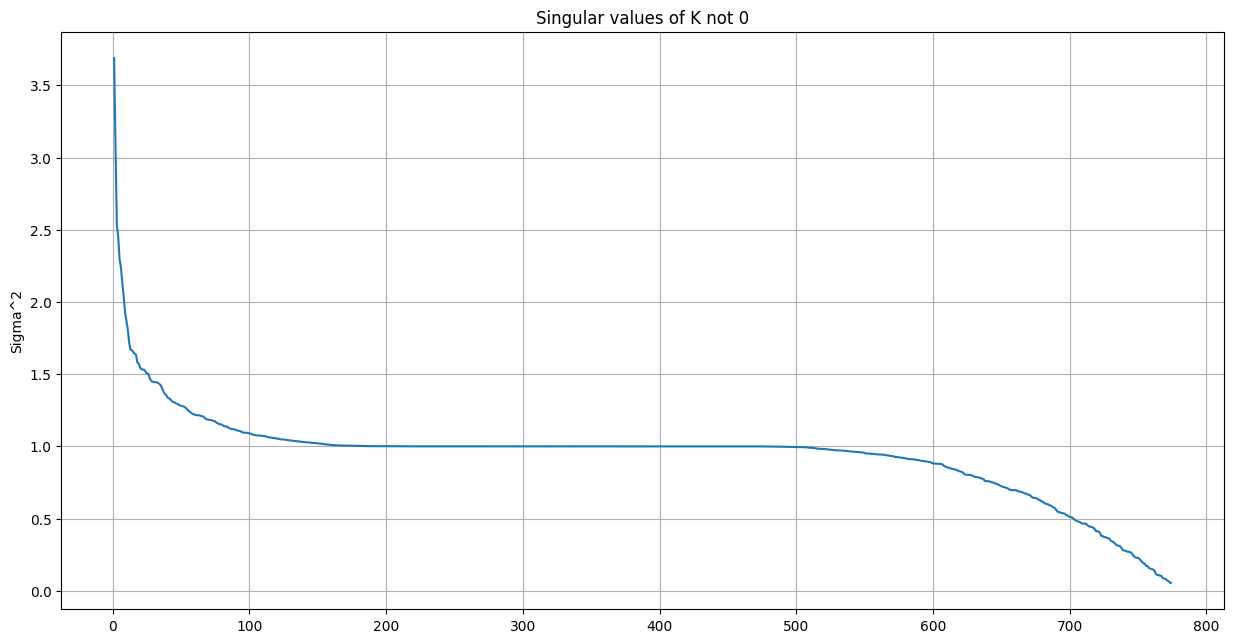

In [63]:
eig_plot = [np.real_if_close(e, tol=1) for (e, _) in E if e > 0.01]

fig = plt.figure(figsize=(15,7.5))
plt.plot(list(range(1, len(eig_plot) + 1)), eig_plot)
plt.grid(True)
plt.title('Singular values of K not 0')
plt.ylabel('Sigma^2')
plt.show()

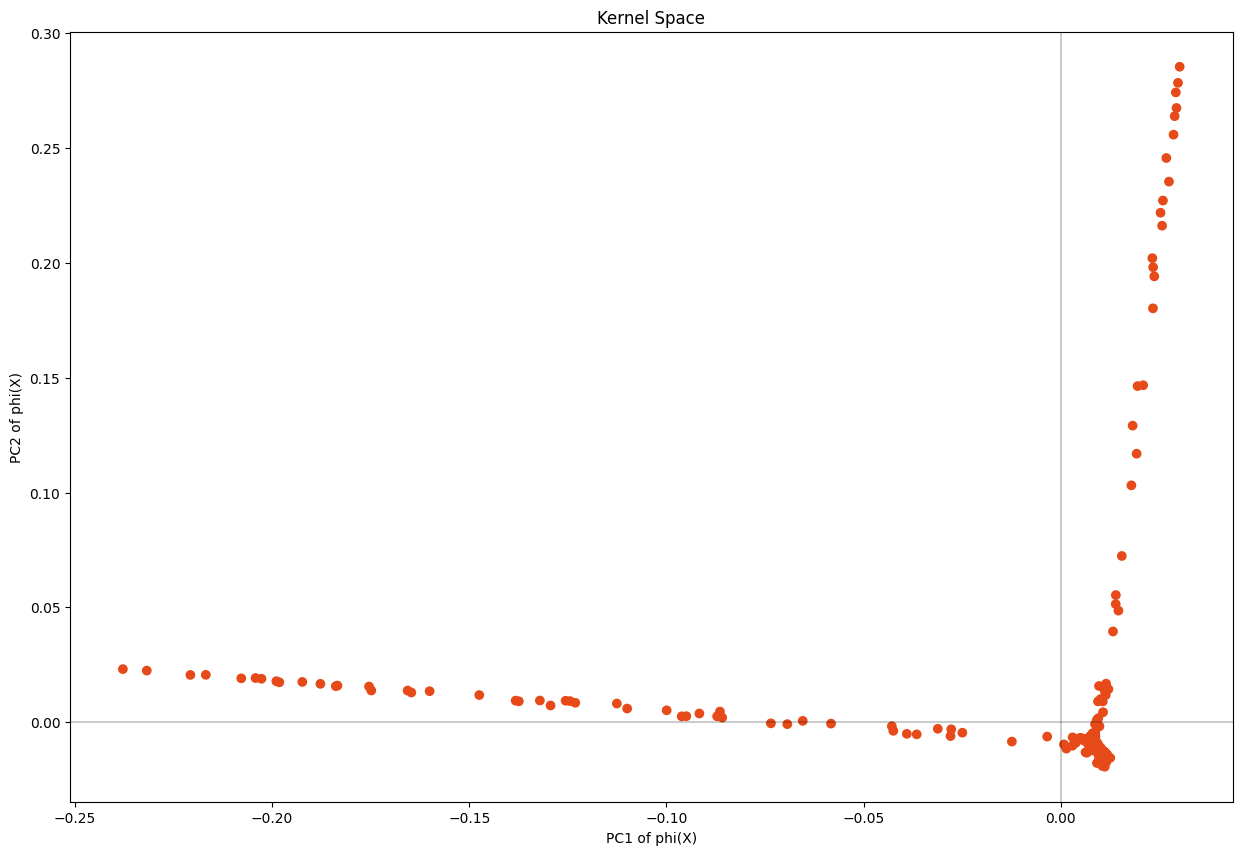

In [64]:
Y = np.ones(X.shape[1])       
colors = ['#E64A19' if e==1 else '#FFB300' for e in Y]

if kpca.d < 2:
    warnings.warn("Less than 2 prinicpal componenets for 2D plot")

fig = plt.figure(figsize=(15,10))
plt.axhline(c = 'black', alpha = 0.2)
plt.axvline(c = 'black', alpha = 0.2)
plt.scatter(T[0,:], T[1,:], c = colors)
plt.grid(False)
plt.title('Kernel Space')
plt.xlabel('PC{} of phi(X)'.format(1))
plt.ylabel('PC{} of phi(X)'.format(2))
plt.show()

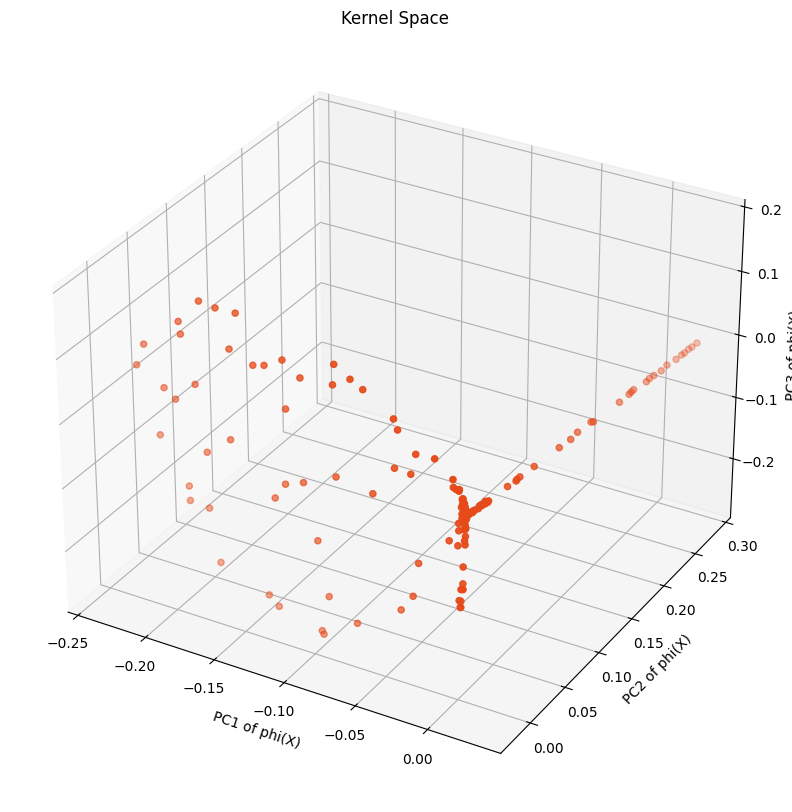

In [65]:
    
if kpca.d < 3:
    warnings.warn("Less than 3 prinicpal componenets for 3D plot")


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(T[0,:], T[1,:], T[2,:], c = colors)
plt.grid(True)
ax.axis('on')
plt.title('Kernel Space')
ax.set_xlabel('PC{} of phi(X)'.format(1))
ax.set_ylabel('PC{} of phi(X)'.format(2))
ax.set_zlabel('PC{} of phi(X)'.format(3))
plt.show()


In [71]:
dataframe = pd.DataFrame.from_records(T.T)

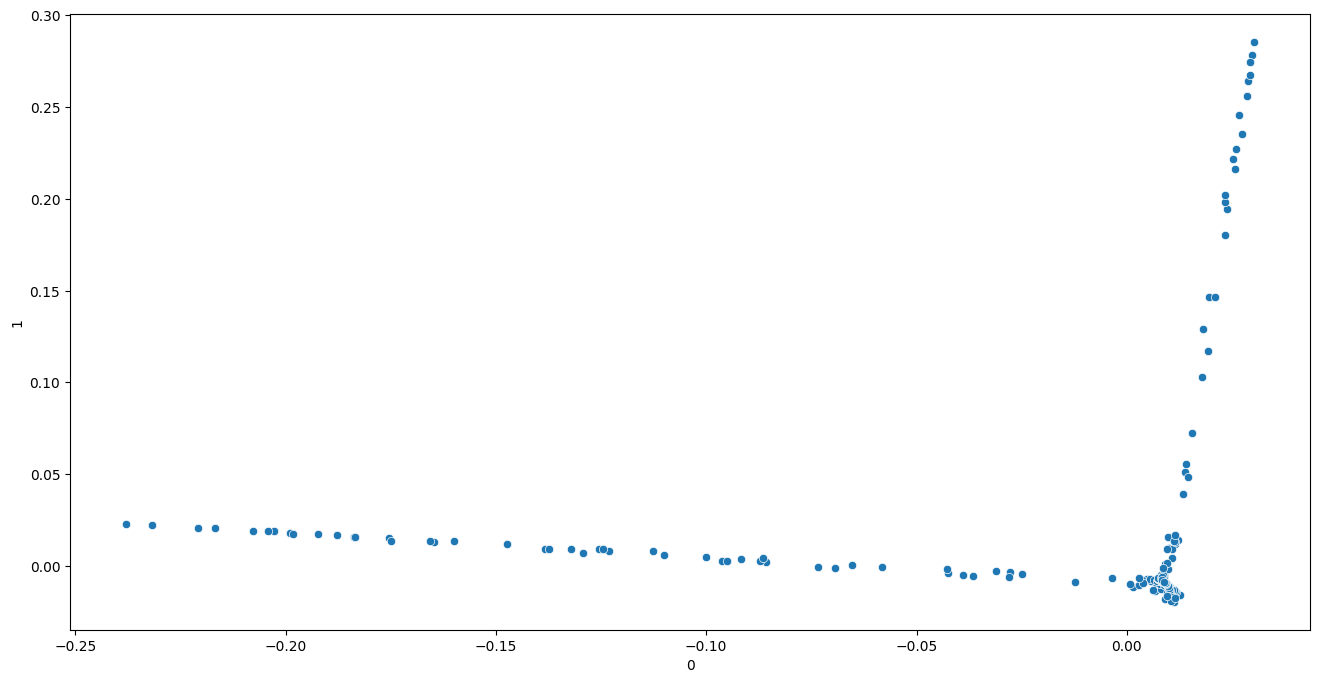

In [72]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=dataframe, x=dataframe[0], y=dataframe[1], ax=ax)
plt.show()

In [92]:
import random

class Point(object):
    def __init__(self, coordinate):
        self.coordinate = coordinate
        self.cluster_idx = None
        
    def is_clustered(self):
        return self.cluster_idx is not None
    
    def cluster(self, cluster_idx):
        self.cluster_idx = cluster_idx


class DBSCAN(object):
    def __init__(self, epsi, min_points):
        self.epsi = epsi
        self.min_points = min_points
    
    @staticmethod
    def _compute_distance(x1, x2):
        return np.sum((x1 - x2)**2)**0.5

    def _find_neighbor_indices(self, core_point, other_points):
        neighbor_indices = []
        
        for idx in range(len(other_points)):
            if self._compute_distance(core_point.coordinate, other_points[idx].coordinate) <= self.epsi:
                neighbor_indices.append(idx)
                
        return neighbor_indices

    def fit(self, df, feature_cols=['0', '1', '2']):
        points = []
        for idx, row in df.loc[:, feature_cols].iterrows():
            points.append(Point(row.to_numpy()))
                    
        free_point_indices = set(range(len(points)))

        core_point_indices = set()
        cluster_count = 0

        while len(free_point_indices) > 0:
            if len(core_point_indices) == 0:
                start_idx = random.choice(list(free_point_indices))
                core_point_indices.add(start_idx)
                free_point_indices.remove(start_idx)
                points[start_idx].cluster(cluster_count)

            while len(core_point_indices) > 0:
                picked_core_point_idx = core_point_indices.pop()
                
                neighbor_indices = self._find_neighbor_indices(points[picked_core_point_idx], points)
                
                if len(neighbor_indices) >= (self.min_points - 1):
                    for neighbor_idx in neighbor_indices:
                        if neighbor_idx in free_point_indices:
                            points[neighbor_idx].cluster(cluster_count)
                            if neighbor_idx in free_point_indices:
                                core_point_indices.add(neighbor_idx)
                                free_point_indices.remove(neighbor_idx)
                    
            cluster_count += 1
                    
        return points

In [160]:
data_scan = pd.DataFrame(T.T)

In [256]:
EPSI = 0.05
MIN_POINTS = 4

model = DBSCAN(epsi=EPSI, min_points=MIN_POINTS)
points = model.fit(data_scan, feature_cols=data_scan.columns)

In [257]:
x, y, z, cluster = [], [], [], []
for point in points:
    _x, _y, _z = point.coordinate
    x.append(_x); y.append(_y); z.append(_z)
    cluster.append(point.cluster_idx)
new_df = pd.DataFrame({'PC1': x, 'PC2': y, 'PC3': z, 'cluster': cluster})

for num in np.unique(cluster): print(f"Cluster {num}: {sum(cluster==num)}")

Cluster 0: 755
Cluster 1: 1
Cluster 2: 1
Cluster 3: 7
Cluster 4: 3
Cluster 5: 4
Cluster 6: 3
Cluster 7: 1


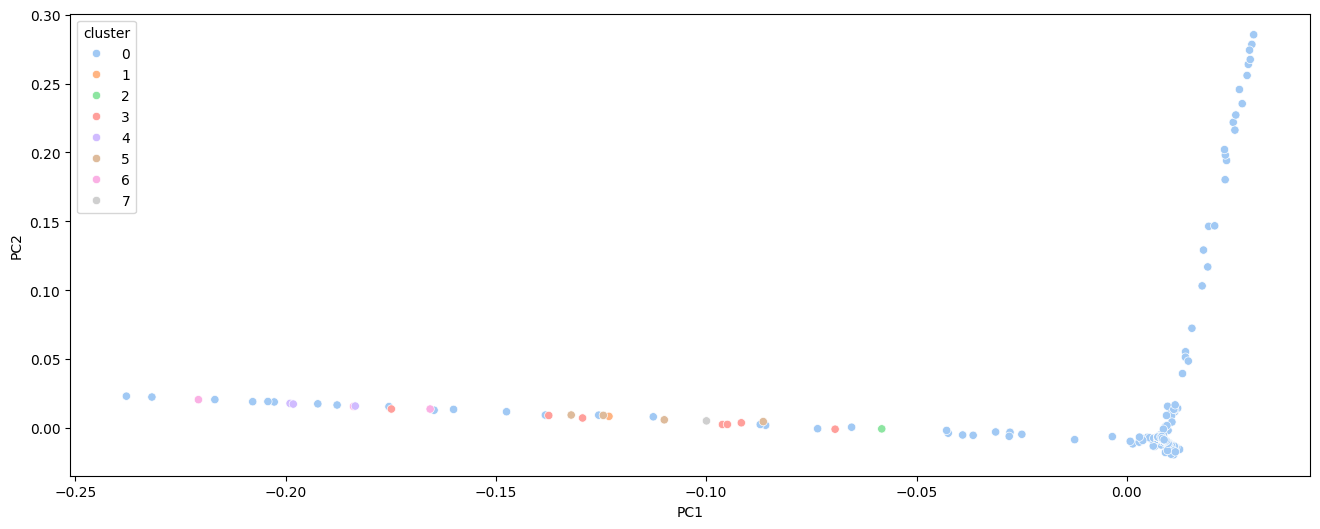

In [258]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.scatterplot(data=new_df, x='PC1', y='PC2', hue='cluster', palette='pastel', ax=ax)
plt.show()

In [260]:
np.unique(cluster)

array([0, 1, 2, 3, 4, 5, 6, 7])

/tmp/ipykernel_4765/3995820038.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=T[0,:][np.where(cluster == ele)], label = ele)
/tmp/ipykernel_4765/3995820038.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=T[0,:][np.where(cluster == ele)], label = ele)
/tmp/ipykernel_4765/3995820038.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=T[0,:][np.where(cluster == ele)], label = ele)


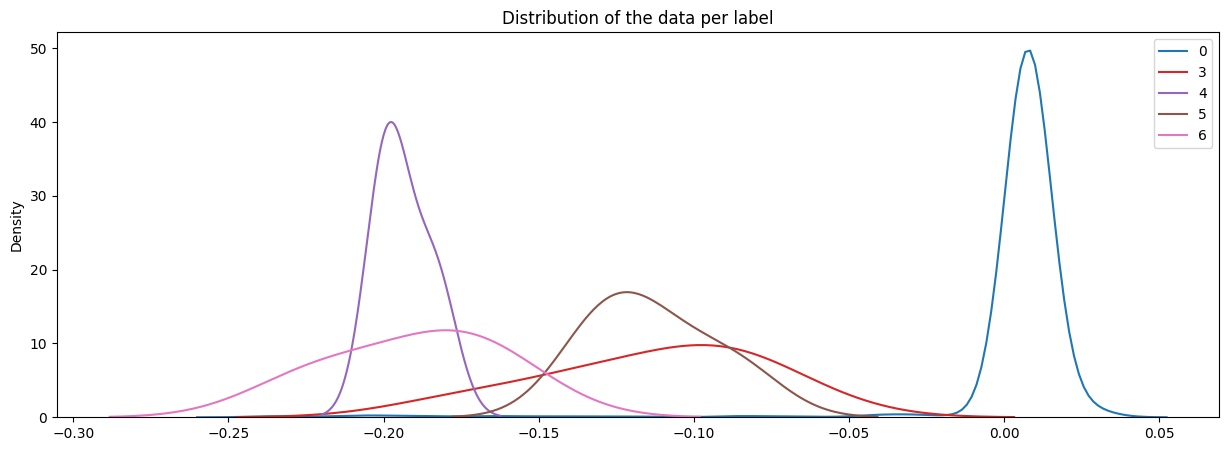

In [261]:

fig = plt.figure(figsize=(15,5))
for ele in np.unique(cluster):
    sns.kdeplot(x=T[0,:][np.where(cluster == ele)], label = ele)

plt.grid(False)
plt.legend()
plt.title('Distribution of the data per label')
plt.show()

(775, 3)